In [ ]:
#EDA and Cleanliness Moisture Data 

#import of libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df_hu=pd.read_csv('Humedad_del_Aire_2_metros_20241004.csv')

In [4]:
df_hu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165025 entries, 0 to 165024
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CodigoEstacion     165025 non-null  int64  
 1   CodigoSensor       165025 non-null  int64  
 2   FechaObservacion   165025 non-null  object 
 3   ValorObservado     165025 non-null  int64  
 4   NombreEstacion     165025 non-null  object 
 5   Departamento       165025 non-null  object 
 6   Municipio          165025 non-null  object 
 7   ZonaHidrografica   165025 non-null  object 
 8   Latitud            165025 non-null  float64
 9   Longitud           165025 non-null  float64
 10  DescripcionSensor  165025 non-null  object 
 11  UnidadMedida       165025 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 15.1+ MB


In [ ]:
"""
1. There is no null data in the data. 
2. columns are found that do not provide information for the project 
3. columns that require a change of data type
"""

In [5]:
df_hu.describe()

,CodigoEstacion,CodigoSensor,ValorObservado,Latitud,Longitud
count,1.650250e+05,165025.0,165025.000000,165025.000000,165025.000000
mean,2.789258e+08,27.0,76.229814,9.904137,-75.078742
std,7.151320e+08,0.0,23.504393,0.726633,0.343992
min,1.401501e+07,27.0,0.000000,7.885417,-75.516028
25%,2.901500e+07,27.0,65.000000,9.715750,-75.278278
50%,2.901504e+07,27.0,83.000000,10.064444,-75.236458
75%,2.903500e+07,27.0,94.000000,10.142583,-74.852222
max,2.901500e+09,27.0,100.000000,10.794167,-74.240972


In [3]:
df_hu.head()

,CodigoEstacion,CodigoSensor,FechaObservacion,ValorObservado,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud,DescripcionSensor,UnidadMedida
0,29015000,27,10/20/2016 02:00:00 AM,100,EL GUAMO - AUT,BOLIVAR,EL GUAMO,BAJO MAGDALENA,10.064444,-74.852222,Humedad del aire 2 mt,%
1,29015000,27,05/07/2016 02:00:00 AM,100,EL GUAMO - AUT,BOLIVAR,EL GUAMO,BAJO MAGDALENA,10.064444,-74.852222,Humedad del aire 2 mt,%
2,29015000,27,07/16/2016 09:00:00 AM,79,EL GUAMO - AUT,BOLIVAR,EL GUAMO,BAJO MAGDALENA,10.064444,-74.852222,Humedad del aire 2 mt,%
3,29015000,27,04/08/2016 08:00:00 PM,69,EL GUAMO - AUT,BOLIVAR,EL GUAMO,BAJO MAGDALENA,10.064444,-74.852222,Humedad del aire 2 mt,%
4,29035000,27,09/12/2017 11:00:00 AM,81,SINCERIN - AUT,BOLIVAR,ARJONA,BAJO MAGDALENA,10.142583,-75.278278,Humedad del aire 2 mt,%


In [6]:
df_hu.columns

Index(['CodigoEstacion', 'CodigoSensor', 'FechaObservacion', 'ValorObservado',
       'NombreEstacion', 'Departamento', 'Municipio', 'ZonaHidrografica',
       'Latitud', 'Longitud', 'DescripcionSensor', 'UnidadMedida'],
      dtype='object')

In [ ]:
# A filtering of the information will be performed by columns, removing columns that are not required for the project

# Creation of a list of columns to be deleted 

delete_colum = ['CodigoSensor', 'NombreEstacion', 'Latitud', 'Longitud', 'DescripcionSensor', 'UnidadMedida']

# Definition of the function for deleting columns 

def column_delete(df_hu):
    # Iteration over each value in the delete_colum list
    for col in delete_colum:
        # We verify that the name is in the columns of the DF
        if col in df_hu.columns:
            # We remove the column at this position
            df_hu = df_hu.drop(columns=[col])
            # Printing the deleted column
            print(f'Deleted column: {col}')
    return df_hu


In [4]:
df_hum= column_delete(df_hu)

Columna eliminada:CodigoSensor
Columna eliminada:NombreEstacion
Columna eliminada:Latitud
Columna eliminada:Longitud
Columna eliminada:DescripcionSensor
Columna eliminada:UnidadMedida


In [11]:
df_hum

,CodigoEstacion,FechaObservacion,ValorObservado,Departamento,Municipio,ZonaHidrografica
0,29015000,10/20/2016 02:00:00 AM,100,BOLIVAR,EL GUAMO,BAJO MAGDALENA
1,29015000,05/07/2016 02:00:00 AM,100,BOLIVAR,EL GUAMO,BAJO MAGDALENA
2,29015000,07/16/2016 09:00:00 AM,79,BOLIVAR,EL GUAMO,BAJO MAGDALENA
3,29015000,04/08/2016 08:00:00 PM,69,BOLIVAR,EL GUAMO,BAJO MAGDALENA
4,29035000,09/12/2017 11:00:00 AM,81,BOLIVAR,ARJONA,BAJO MAGDALENA
...,...,...,...,...,...,...
165020,29035000,12/31/2020 04:00:00 PM,67,BOLIVAR,ARJONA,BAJO MAGDALENA
165021,29035000,12/31/2020 01:00:00 PM,61,BOLIVAR,ARJONA,BAJO MAGDALENA
165022,29035000,12/31/2020 02:00:00 PM,60,BOLIVAR,ARJONA,BAJO MAGDALENA
165023,29015000,12/31/2020 09:00:00 PM,51,BOLIVAR,EL GUAMO,BAJO MAGDALENA


In [ ]:
# let´s change data type of columns FechaObservación and add AñoObservacionH column
#data type chanfe 
df_hum['FechaObservacion']=pd.to_datetime(df_hum['FechaObservacion'])

#creation AñoObservacionH column
df_hum['AñoObservacionH']= df_hum['FechaObservacion'].dt.year
df_hum['FechaObservacion']= df_hum['FechaObservacion'].dt.date


In [6]:
df_hume=df_hum

In [14]:
df_hume

,CodigoEstacion,FechaObservacion,ValorObservado,Departamento,Municipio,ZonaHidrografica,AñoObservacionH
0,29015000,2016-10-20,100,BOLIVAR,EL GUAMO,BAJO MAGDALENA,2016
1,29015000,2016-05-07,100,BOLIVAR,EL GUAMO,BAJO MAGDALENA,2016
2,29015000,2016-07-16,79,BOLIVAR,EL GUAMO,BAJO MAGDALENA,2016
3,29015000,2016-04-08,69,BOLIVAR,EL GUAMO,BAJO MAGDALENA,2016
4,29035000,2017-09-12,81,BOLIVAR,ARJONA,BAJO MAGDALENA,2017
...,...,...,...,...,...,...,...
165020,29035000,2020-12-31,67,BOLIVAR,ARJONA,BAJO MAGDALENA,2020
165021,29035000,2020-12-31,61,BOLIVAR,ARJONA,BAJO MAGDALENA,2020
165022,29035000,2020-12-31,60,BOLIVAR,ARJONA,BAJO MAGDALENA,2020
165023,29015000,2020-12-31,51,BOLIVAR,EL GUAMO,BAJO MAGDALENA,2020


In [ ]:
#check duplicated data
df_hume.duplicated().any()

np.True_

In [ ]:
#remove duplicated data
df_humed=df_hume.drop_duplicates()

In [9]:
df_humed.duplicated().any()

np.False_

In [10]:
df_humed.shape

(98726, 7)

In [ ]:
# Review of unique values in the columns

# Definition of the unique value function

def valor_unico(df_humed):
    saver = {}
    for c in df_humed.columns:
        # Counter of unique values
        count = df_humed[c].nunique()
        # Save unique values in the position
        saver[c] = (count)
    return saver

# Obtaining or saving unique values
v_unicos = valor_unico(df_humed)

# Printing each unique value by column
for col, val in v_unicos.items():
    print(f'Unique Value in {col}:  {val}')


Valor Unico en CodigoEstacion:  9
Valor Unico en FechaObservacion:  1822
Valor Unico en ValorObservado:  101
Valor Unico en Departamento:  1
Valor Unico en Municipio:  7
Valor Unico en ZonaHidrografica:  4
Valor Unico en AñoObservacionH:  5


In [ ]:
# We review unique values of categorical variables
# Specifically the column 'Municipio'
columna_Mun = 'Municipio'
# We define a function to see each unique value
def unique_catg(df_humed, columna):
    # Check the column in the DataFrame
    if columna in df_humed.columns:
        # Get the unique value
        unicos = df_humed[columna].unique()
        # Count the number of unique values
        cantitad_unicos = len(unicos)
        # Print each unique value
        for i in unicos:
            print(f'*{i}')
        print(f'The number of unique values in {columna} is: {cantitad_unicos}')


In [ ]:
# execute unique value in categorical columns

unique_catg(df_humed, columna_Mun)

*EL GUAMO
*ARJONA
*EL CARMÉN DE BOLÍVAR
*SANTA CATALINA
*SANTA ROSA DEL SUR
*CARTAGENA DE INDIAS
*ACHÍ
La cantidad de valores unicos de Municipio son : 7


In [ ]:
# change tiltes to value without tildes
df_humed.loc[:, 'Municipio'] = df_humed['Municipio'].str.replace('í', 'i')
df_humed.loc[:, 'Municipio'] = df_humed['Municipio'].str.replace('é', 'e')


In [15]:
df_humed['Municipio']= df_humed['Municipio'].str.lower()

C:\Users\Cristin Rodriguez\AppData\Local\Temp\ipykernel_14128\678192514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_humed['Municipio']= df_humed['Municipio'].str.lower()


In [18]:
unique_catg(df_humed, columna_Mun)


*el guamo
*arjona
*el carmen de bolivar
*santa catalina
*santa rosa del sur
*cartagena de indias
*achi
La cantidad de valores unicos de Municipio son : 7


In [45]:
df_humed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98726 entries, 0 to 165023
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CodigoEstacion    98726 non-null  int64 
 1   FechaObservacion  98726 non-null  object
 2   ValorObservado    98726 non-null  int64 
 3   Departamento      98726 non-null  object
 4   Municipio         98726 non-null  object
 5   ZonaHidrografica  98726 non-null  object
 6   AñoObservacionH   98726 non-null  int32 
dtypes: int32(1), int64(2), object(4)
memory usage: 5.6+ MB


In [46]:
df_humed.head()

,CodigoEstacion,FechaObservacion,ValorObservado,Departamento,Municipio,ZonaHidrografica,AñoObservacionH
0,29015000,2016-10-20,100,BOLIVAR,EL GUAMO,BAJO MAGDALENA,2016
1,29015000,2016-05-07,100,BOLIVAR,EL GUAMO,BAJO MAGDALENA,2016
2,29015000,2016-07-16,79,BOLIVAR,EL GUAMO,BAJO MAGDALENA,2016
3,29015000,2016-04-08,69,BOLIVAR,EL GUAMO,BAJO MAGDALENA,2016
4,29035000,2017-09-12,81,BOLIVAR,ARJONA,BAJO MAGDALENA,2017


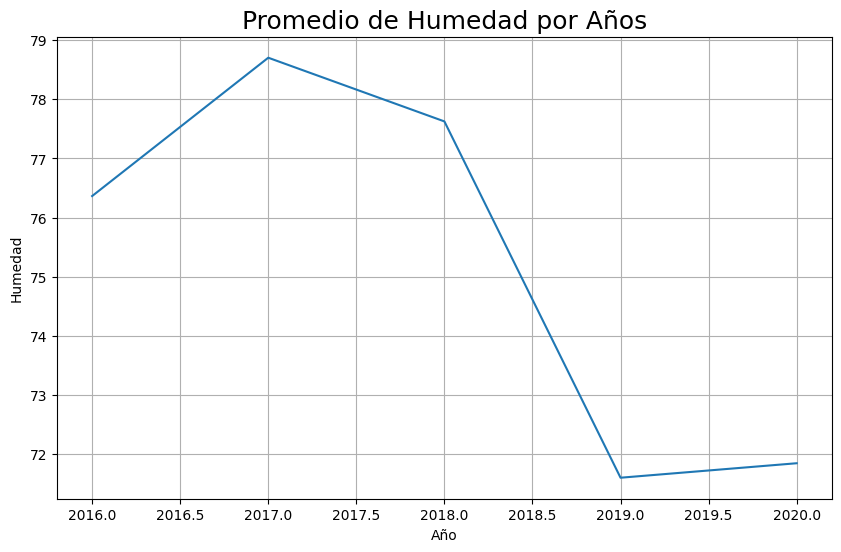

In [ ]:
# Let's graphically see the humidity data by year

# Grouping by year and the average humidity
df_group_A_P = df_humed.groupby('AñoObservacionH', as_index=False)['ValorObservado'].mean()

# Creating a line graph for YEAR vs Humidity

# Set the canvas
plt.figure(figsize=(10, 6))
# Establish the graph
sns.lineplot(x='AñoObservacionH', y='ValorObservado', data=df_group_A_P)

# Design of the graph
plt.title('Average Humidity by Year', fontsize=18)
plt.xlabel('Year')
plt.ylabel('Humidity')

# Visualization
plt.grid()
plt.show()


In [ ]:
# save data clean
df_humed.to_csv('HUmedadB1620_clean.csv')

In [22]:
df= pd.read_csv('HumedadB1620_clean.csv')

In [24]:
df.head()

,Unnamed: 0,CodigoEstacion,FechaObservacion,ValorObservado,Departamento,Municipio,ZonaHidrografica,AñoObservacionH
0,0,29015000,2016-10-20,100,BOLIVAR,el guamo,BAJO MAGDALENA,2016
1,1,29015000,2016-05-07,100,BOLIVAR,el guamo,BAJO MAGDALENA,2016
2,2,29015000,2016-07-16,79,BOLIVAR,el guamo,BAJO MAGDALENA,2016
3,3,29015000,2016-04-08,69,BOLIVAR,el guamo,BAJO MAGDALENA,2016
4,4,29035000,2017-09-12,81,BOLIVAR,arjona,BAJO MAGDALENA,2017


In [ ]:
#remove not neccesary column
df = df.drop(columns=['Unnamed: 0'])


In [ ]:
#rename columns to join later
df.rename(columns={
    'Municipio': 'municipio',
    'AñoObservacionH':'periodo'},inplace=True)

print(df.columns)

Index(['CodigoEstacion', 'FechaObservacion', 'ValorObservado', 'Departamento',
       'municipio', 'ZonaHidrografica', 'periodo'],
      dtype='object')


In [ ]:
# save data clean again

In [28]:
df.to_csv('HumedadB1620_clean.csv')